In [1]:
import pandas as pd
import numpy as np

先做一些前期的数据探索和准备工作

In [2]:
df_hair = pd.read_csv("hair_dryer.tsv", sep='\t')
df_hair.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     34678741   R9T1FE2ZX2X04  B003V264WW       732252283   
1          US     11599505   RE36JAD5V53PO  B0009XH6V4       670161917   
2          US      2282190   RIDHM8B7SCCV3  B0007NZPY6        16483457   
3          US     43669858  R14QGWPCHU9LSE  B00BB8ZIW0       253917972   
4          US       107098  R35BHQJHXXJD59  B003V264WW       732252283   

                                       product_title product_category  \
0  remington ac2015 t|studio salon collection pea...           Beauty   
1                       andis micro turbo hair dryer           Beauty   
2                              conair pro hair dryer           Beauty   
3     remington silk ceramic professional hair dryer           Beauty   
4  remington ac2015 t|studio salon collection pea...           Beauty   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            4              0            0    N                 Y   
2            5              0            1    N                 Y   
3            5              0            0    N                 Y   
4            4              0            0    N                 N   

                                     review_headline  \
0                                        Works great   
1  I love travel blow dryers because they are eas...   
2                                         Five Stars   
3                                         Five Stars   
4        I think's great. The cord length is perfect   

                                         review_body review_date  
0                                       Works great!   8/31/2015  
1  This dries my hair faster that bigger, more po...   8/31/2015  
2                                   Love this dryer!   8/31/2015  
3                              styling hair in style   8/31/2015  
4  I just got this last week. I think's great. Th...   8/31/2015

In [3]:
import matplotlib.pyplot as plt

In [4]:
len(df_hair)

11470

In [5]:
df_hair_Y = df_hair.loc[df_hair['verified_purchase']=='Y',: ]

In [6]:
len(df_hair_Y)

9811

In [7]:
df_hair_Y.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     34678741   R9T1FE2ZX2X04  B003V264WW       732252283   
1          US     11599505   RE36JAD5V53PO  B0009XH6V4       670161917   
2          US      2282190   RIDHM8B7SCCV3  B0007NZPY6        16483457   
3          US     43669858  R14QGWPCHU9LSE  B00BB8ZIW0       253917972   
5          US     51995766  R230LCPQDOFJJZ  B000065DJY       919751065   

                                       product_title product_category  \
0  remington ac2015 t|studio salon collection pea...           Beauty   
1                       andis micro turbo hair dryer           Beauty   
2                              conair pro hair dryer           Beauty   
3     remington silk ceramic professional hair dryer           Beauty   
5                 revlon 1875w volumizing hair dryer           Beauty   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            4              0            0    N                 Y   
2            5              0            1    N                 Y   
3            5              0            0    N                 Y   
5            5              0            0    N                 Y   

                                     review_headline  \
0                                        Works great   
1  I love travel blow dryers because they are eas...   
2                                         Five Stars   
3                                         Five Stars   
5                                         Five Stars   

                                         review_body review_date  
0                                       Works great!   8/31/2015  
1  This dries my hair faster that bigger, more po...   8/31/2015  
2                                   Love this dryer!   8/31/2015  
3                              styling hair in style   8/31/2015  
5                                   Excellent dryer.   8/31/2015

In [8]:
pip install snownlp -i http://pypi.douban.com/simple --trusted-host pypi.douban.com

Looking in indexes: http://pypi.douban.com/simple
Note: you may need to restart the kernel to use updated packages.


In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\22910\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
df_hair_Y.index = range(len(df_hair_Y))

In [12]:
df_hair_Y.loc[0, 'review_body']

'Works great!'

In [13]:
sents = []
sid = SentimentIntensityAnalyzer()

In [14]:
for i in range(len(df_hair_Y)):
    s = sid.polarity_scores(df_hair_Y.loc[i, 'review_body'])
    sents.append(s['compound'])
sents

[0.6588,
 0.9562,
 0.6696,
 0.0,
 0.5719,
 0.4545,
 0.5719,
 0.5494,
 0.765,
 -0.1531,
 0.4215,
 0.8717,
 0.5574,
 -0.1531,
 0.8773,
 0.0,
 0.5719,
 0.4404,
 0.4452,
 0.8107,
 0.93,
 0.7783,
 0.9297,
 0.7906,
 0.0,
 0.6369,
 0.9512,
 0.845,
 0.8619,
 0.5297,
 0.5719,
 0.6249,
 0.8555,
 0.8932,
 0.6157,
 0.6124,
 0.722,
 -0.5994,
 -0.3412,
 0.7684,
 0.9078,
 0.6213,
 -0.5719,
 -0.6597,
 0.4754,
 0.0,
 0.5994,
 0.9427,
 0.765,
 -0.4144,
 0.4588,
 0.4215,
 0.5927,
 0.1501,
 0.7506,
 0.7485,
 0.4404,
 0.0,
 0.706,
 0.904,
 0.0,
 0.91,
 0.6468,
 0.6213,
 0.7096,
 0.0,
 0.4404,
 0.177,
 0.6808,
 0.3549,
 0.4664,
 0.6369,
 0.0,
 0.8713,
 0.9116,
 0.2124,
 0.4404,
 0.0,
 0.7405,
 0.9073,
 0.5423,
 0.9192,
 -0.1444,
 0.6369,
 0.9729,
 0.6683,
 0.9574,
 0.6213,
 0.7777,
 0.4215,
 0.6249,
 0.0,
 -0.4767,
 0.8715,
 0.0,
 0.8946,
 0.6213,
 0.4215,
 -0.4767,
 0.5719,
 0.9324,
 0.8571,
 0.8605,
 0.7092,
 0.5859,
 -0.2225,
 0.422,
 0.6597,
 0.6249,
 0.9807,
 0.3708,
 0.5719,
 -0.128,
 0.7745,
 0.6369,

<AxesSubplot:ylabel='Frequency'>

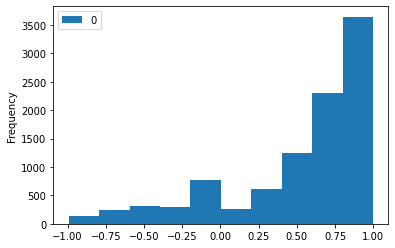

In [15]:
pd.DataFrame(sents).plot.hist()

In [16]:
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


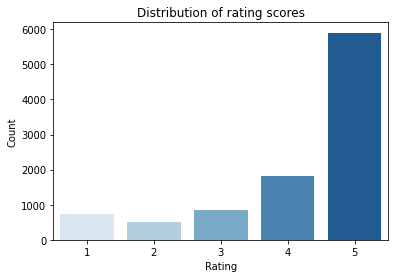

In [17]:
# distribution of rating
sns.countplot(df_hair_Y['star_rating'], palette='Blues')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<AxesSubplot:ylabel='Frequency'>

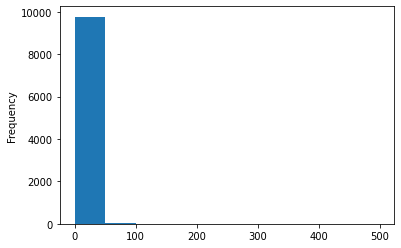

In [18]:
df_hair_Y['helpful_votes'].plot.hist()

In [19]:
len(df_hair_Y.loc[0, 'review_body'])

12

In [20]:
from nltk import word_tokenize
from nltk import Text

In [21]:
len_review = []
for i in range(len(df_hair_Y)):
    s = word_tokenize(df_hair_Y.loc[i, 'review_body'])
    text=Text(s)
    len_review.append(len(text))

<AxesSubplot:xlabel='0'>

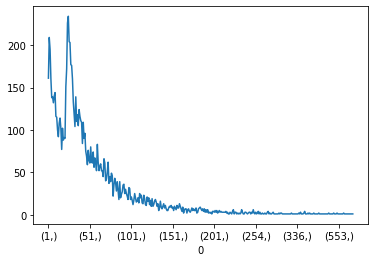

In [22]:
pd.DataFrame(len_review).value_counts().sort_index().plot.line()

In [23]:
# get all used words 
all_words = pd.Series(' '.join(df_hair_Y['review_body']).split())

In [24]:
pip install wordcloud

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

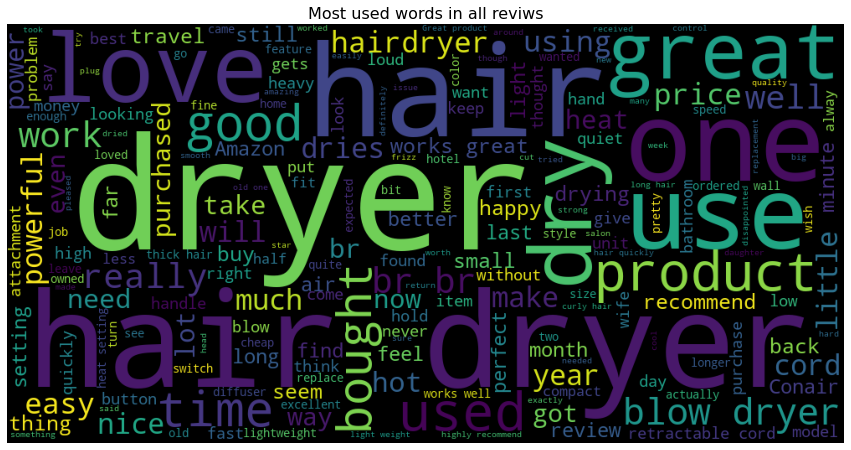

In [26]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

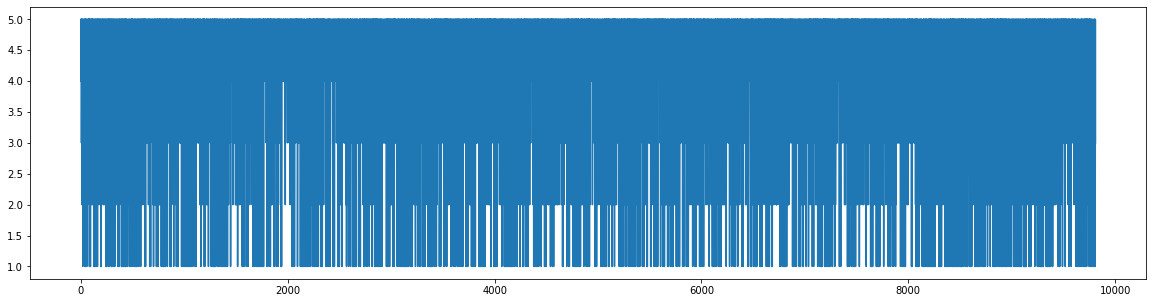

In [27]:
plt.figure(figsize=(20, 5))
plt.plot(df_hair_Y['star_rating'])

In [28]:
df_hair_Y['review_date'] = pd.to_datetime(df_hair_Y['review_date'], format = '%m/%d/%Y')

C:\Users\22910\AppData\Local\Temp/ipykernel_13652/1992387446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hair_Y['review_date'] = pd.to_datetime(df_hair_Y['review_date'], format = '%m/%d/%Y')


In [29]:
df_hair_Y.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     34678741   R9T1FE2ZX2X04  B003V264WW       732252283   
1          US     11599505   RE36JAD5V53PO  B0009XH6V4       670161917   
2          US      2282190   RIDHM8B7SCCV3  B0007NZPY6        16483457   
3          US     43669858  R14QGWPCHU9LSE  B00BB8ZIW0       253917972   
4          US     51995766  R230LCPQDOFJJZ  B000065DJY       919751065   

                                       product_title product_category  \
0  remington ac2015 t|studio salon collection pea...           Beauty   
1                       andis micro turbo hair dryer           Beauty   
2                              conair pro hair dryer           Beauty   
3     remington silk ceramic professional hair dryer           Beauty   
4                 revlon 1875w volumizing hair dryer           Beauty   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            4              0            0    N                 Y   
2            5              0            1    N                 Y   
3            5              0            0    N                 Y   
4            5              0            0    N                 Y   

                                     review_headline  \
0                                        Works great   
1  I love travel blow dryers because they are eas...   
2                                         Five Stars   
3                                         Five Stars   
4                                         Five Stars   

                                         review_body review_date  
0                                       Works great!  2015-08-31  
1  This dries my hair faster that bigger, more po...  2015-08-31  
2                                   Love this dryer!  2015-08-31  
3                              styling hair in style  2015-08-31  
4                                   Excellent dryer.  2015-08-31

下面是一些时间序列方面的简单可视化

C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Monthly Star Rating')

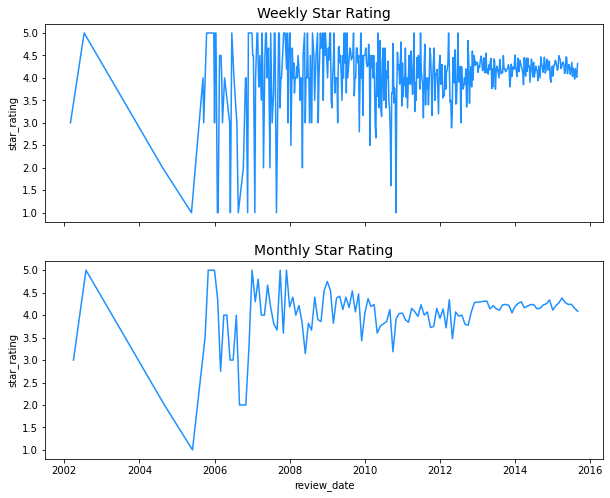

In [30]:
resampled_df = df_hair_Y[['review_date','star_rating']].resample('7D', on='review_date').mean().reset_index(drop=False)
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,8))
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[0])
ax[0].set_title('Weekly Star Rating', fontsize=14)
resampled_df = df_hair_Y[['review_date','star_rating']].resample('M', on='review_date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[1])
ax[1].set_title('Monthly Star Rating', fontsize=14)

C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sum of Monthly Star Rating')

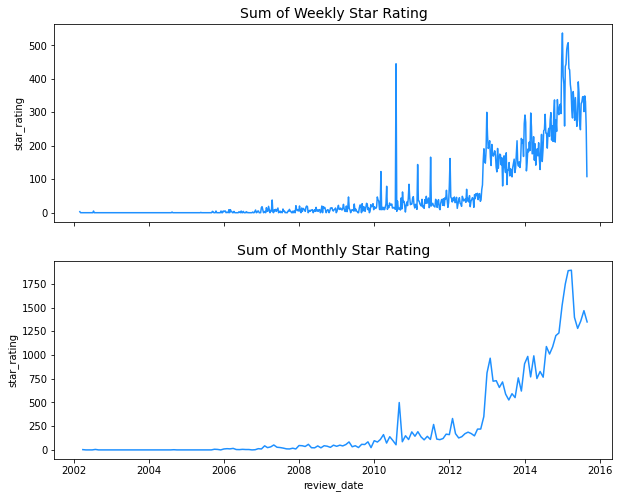

In [31]:
resampled_df = df_hair_Y[['review_date','star_rating']].resample('7D', on='review_date').sum().reset_index(drop=False)
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,8))
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[0])
ax[0].set_title('Sum of Weekly Star Rating', fontsize=14)
resampled_df = df_hair_Y[['review_date','star_rating']].resample('M', on='review_date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[1])
ax[1].set_title('Sum of Monthly Star Rating', fontsize=14)

C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='review_date', ylabel='star_rating'>

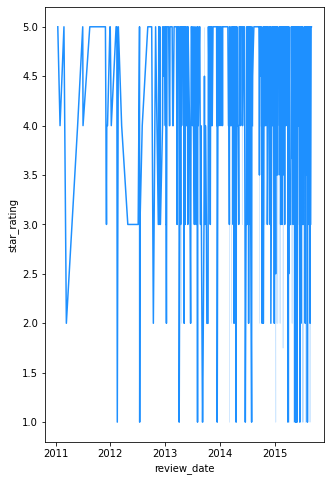

In [32]:
df_hair_Y1 = df_hair_Y.loc[df_hair_Y['product_id']=='B003V264WW', :]
fig, ax = plt.subplots(ncols=1, nrows=1, sharex=True, figsize=(5,8))
sns.lineplot(df_hair_Y1['review_date'], df_hair_Y1['star_rating'], color='dodgerblue', ax=ax)

C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sum of Monthly Star Rating')

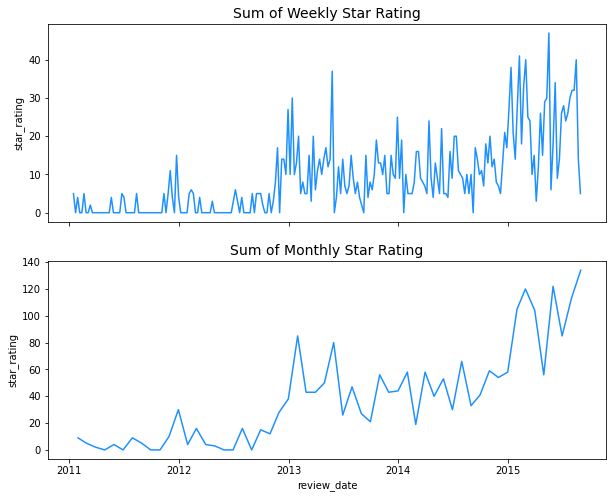

In [33]:
resampled_df = df_hair_Y1[['review_date','star_rating']].resample('7D', on='review_date').sum().reset_index(drop=False)
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,8))
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[0])
ax[0].set_title('Sum of Weekly Star Rating', fontsize=14)
resampled_df = df_hair_Y1[['review_date','star_rating']].resample('M', on='review_date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[1])
ax[1].set_title('Sum of Monthly Star Rating', fontsize=14)

C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Monthly Star Rating')

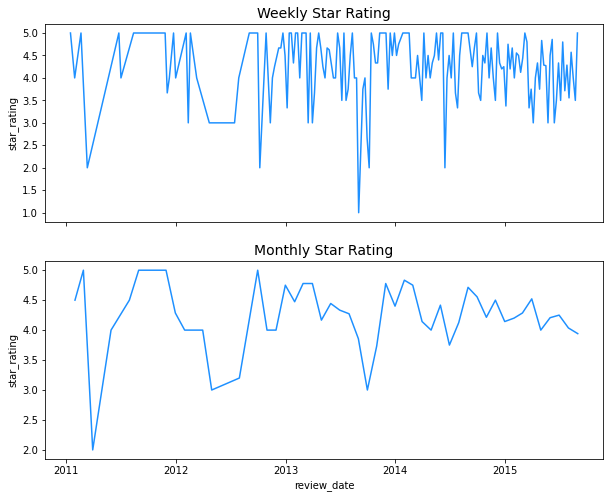

In [34]:
resampled_df = df_hair_Y1[['review_date','star_rating']].resample('7D', on='review_date').mean().reset_index(drop=False)
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(10,8))
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[0])
ax[0].set_title('Weekly Star Rating', fontsize=14)
resampled_df = df_hair_Y1[['review_date','star_rating']].resample('M', on='review_date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[1])
ax[1].set_title('Monthly Star Rating', fontsize=14)

从可视化的结果来看，购买量逐步提升，产品评分基本趋于稳定

下面先选取一些可能有用的特征出来吧

In [35]:
df_features = df_hair_Y[['star_rating','helpful_votes']]

In [36]:
df_features['sentiment_scores'] = pd.DataFrame(sents)

C:\Users\22910\AppData\Local\Temp/ipykernel_13652/1181375381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['sentiment_scores'] = pd.DataFrame(sents)


In [37]:
df_features['len_review'] = pd.DataFrame(len_review)

C:\Users\22910\AppData\Local\Temp/ipykernel_13652/396834323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['len_review'] = pd.DataFrame(len_review)


In [38]:
df_features.head()

star_rating  helpful_votes  sentiment_scores  len_review
0            5              0            0.6588           3
1            4              0            0.9562          84
2            5              0            0.6696           4
3            5              0            0.0000           4
4            5              0            0.5719           3

In [39]:
features_columns = ['star_rating', 'helpful_votes', 'sentiment_scores', 'len_review']

Text(0.5, 1.0, 'Correlation Matrix of Some Features')

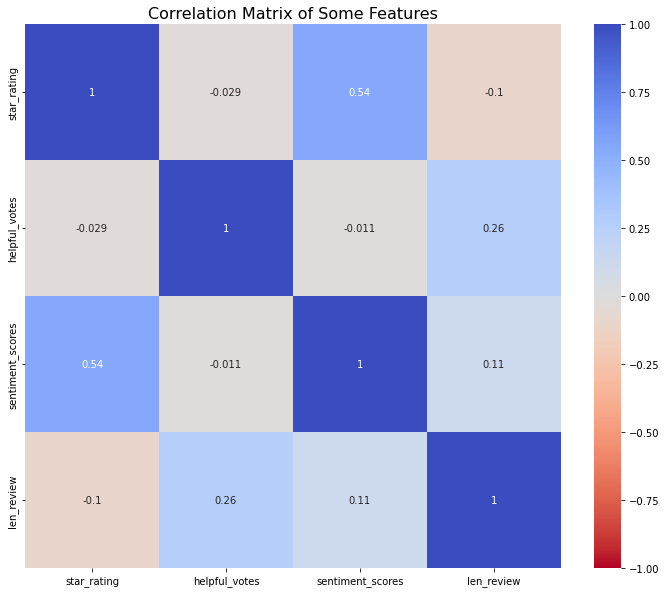

In [40]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))

corrmat = df_features[features_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Some Features', fontsize=16)

In [41]:
df_hair_Y2 = df_hair_Y.loc[df_hair_Y['product_id']=='B0009XH6TG', :]

C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\22910\anacond

Text(0.5, 1.0, 'Sum of Monthly Star Rating')

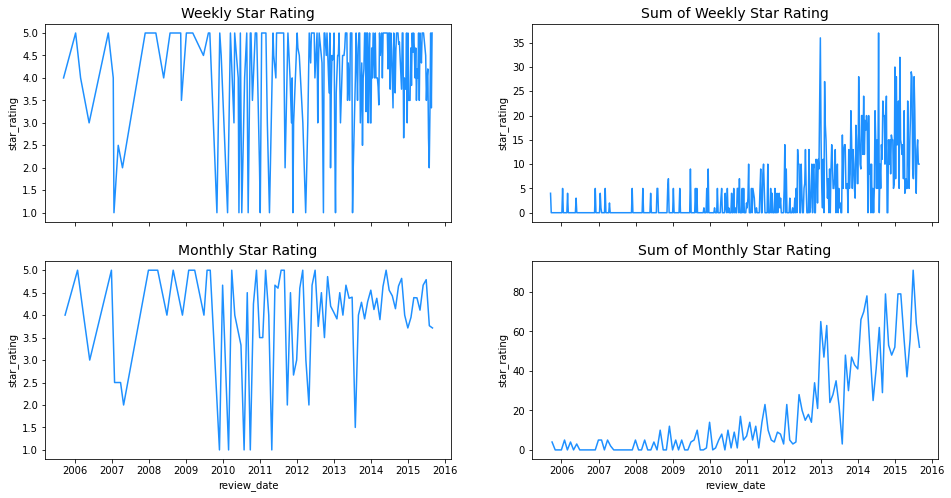

In [42]:
resampled_df = df_hair_Y2[['review_date','star_rating']].resample('7D', on='review_date').mean().reset_index(drop=False)
fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(16,8))
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Weekly Star Rating', fontsize=14)
resampled_df = df_hair_Y2[['review_date','star_rating']].resample('M', on='review_date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Monthly Star Rating', fontsize=14)


resampled_df = df_hair_Y2[['review_date','star_rating']].resample('7D', on='review_date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Sum of Weekly Star Rating', fontsize=14)
resampled_df = df_hair_Y2[['review_date','star_rating']].resample('M', on='review_date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Sum of Monthly Star Rating', fontsize=14)

In [43]:
df_hair_Y3 = df_hair_Y.loc[df_hair_Y['product_id']=='B00132ZG3U', :]

C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\22910\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\22910\anacond

Text(0.5, 1.0, 'Sum of Monthly Star Rating')

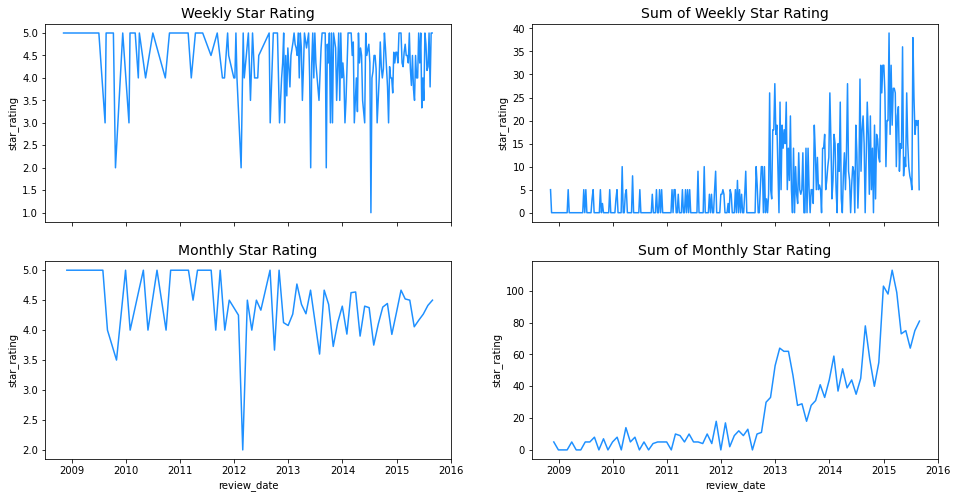

In [44]:
resampled_df = df_hair_Y3[['review_date','star_rating']].resample('7D', on='review_date').mean().reset_index(drop=False)
fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(16,8))
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Weekly Star Rating', fontsize=14)
resampled_df = df_hair_Y3[['review_date','star_rating']].resample('M', on='review_date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Monthly Star Rating', fontsize=14)


resampled_df = df_hair_Y3[['review_date','star_rating']].resample('7D', on='review_date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Sum of Weekly Star Rating', fontsize=14)
resampled_df = df_hair_Y3[['review_date','star_rating']].resample('M', on='review_date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['review_date'], resampled_df['star_rating'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Sum of Monthly Star Rating', fontsize=14)

In [86]:
resampled_df = df_hair_Y3[['review_date','star_rating']].resample('M', on='review_date').sum().reset_index(drop=False)

In [87]:
resampled_df.head()

review_date  star_rating
0  2008-11-30            5
1  2008-12-31            0
2  2009-01-31            0
3  2009-02-28            0
4  2009-03-31            5

In [94]:
resampled_df.loc[43, 'star_rating']

13

In [47]:
pip install git+https://github.com/rwalk/gsdmm.git

  Cloning https://github.com/rwalk/gsdmm.git to c:\users\22910\appdata\local\temp\pip-req-build-dzh9_sfl
  Resolved https://github.com/rwalk/gsdmm.git to commit 4ad1b6b6976743681ee4976b4573463d359214ee
  Created wheel for gsdmm: filename=gsdmm-0.1-py3-none-any.whl size=4631 sha256=b75246580a9b62e4d5c059a1435cbf8373a7658aa247f38321a8c3a6528d07f4
  Stored in directory: C:\Users\22910\AppData\Local\Temp\pip-ephem-wheel-cache-mkwc0oy9\wheels\81\2c\23\3ff788bcc6063bf30116ad1a06e75d3ba9aad3f7bc4aba765b
Successfully built gsdmm
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/rwalk/gsdmm.git 'C:\Users\22910\AppData\Local\Temp\pip-req-build-dzh9_sfl'


In [49]:
pip install gensim

  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20445 sha256=e90aedf79d627e23e5fccfe4bbebda05969aef01e6f313448cc655ccb166b9a4
  Stored in directory: c:\users\22910\appdata\local\pip\cache\wheels\99\66\48\d7ce0c6927f6abf167bbcdee537affc7b92c03632f78028411
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=5996965e237a975016254610d4e0a28a7124b066a8e9a0af9057bc68ec14f50e
  Stored in directory: c:\users\22910\appdata\local\pip\cache\wheels\d9\c7\71\db1d4646d963b34c530667501d3d6f34c0825eaffae2f0f2cb
Successfully built fst-pso miniful
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install spacy


  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4


In [53]:
from gsdmm import MovieGroupProcess

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models
from gensim.utils import simple_preprocess
import gensim
from gensim.models.ldamulticore import LdaMulticore
import re


from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [54]:
data = df_hair_Y

In [55]:
data['review_list'] = df_hair_Y['review_body'].values.tolist()
# remove characters
data['review_list'] = [re.sub('\s+', ' ', sent) for sent in data['review_list']]
data['review_list'] = [re.sub("\'", "", sent) for sent in data['review_list']]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

C:\Users\22910\AppData\Local\Temp/ipykernel_13652/2531993133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_list'] = df_hair_Y['review_body'].values.tolist()
C:\Users\22910\AppData\Local\Temp/ipykernel_13652/2531993133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review_list'] = [re.sub('\s+', ' ', sent) for sent in data['review_list']]
C:\Users\22910\AppData\Local\Temp/ipykernel_13652/2531993133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [56]:
# create N-grams
def make_n_grams(texts):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)  # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[texts], threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text

In [57]:
tokens_reviews = list(sent_to_words(data['review_list']))
tokens_reviews[0]

['works', 'great']

In [58]:
tokens_reviews = make_n_grams(tokens_reviews)
tokens_reviews[0]

['works', 'great']

In [59]:
np.random.seed(0)

In [60]:
mgp = MovieGroupProcess(K=6, alpha=0.01, beta=0.01, n_iters=30)

vocab = set(x for review in tokens_reviews for x in review)
n_terms = len(vocab)
model = mgp.fit(tokens_reviews, n_terms)

In stage 0: transferred 7771 clusters with 6 clusters populated
In stage 1: transferred 5279 clusters with 6 clusters populated
In stage 2: transferred 3525 clusters with 6 clusters populated
In stage 3: transferred 2544 clusters with 6 clusters populated
In stage 4: transferred 2075 clusters with 6 clusters populated
In stage 5: transferred 1757 clusters with 6 clusters populated
In stage 6: transferred 1571 clusters with 6 clusters populated
In stage 7: transferred 1463 clusters with 6 clusters populated
In stage 8: transferred 1482 clusters with 6 clusters populated
In stage 9: transferred 1471 clusters with 6 clusters populated
In stage 10: transferred 1445 clusters with 6 clusters populated
In stage 11: transferred 1323 clusters with 6 clusters populated
In stage 12: transferred 1280 clusters with 6 clusters populated
In stage 13: transferred 1306 clusters with 6 clusters populated
In stage 14: transferred 1257 clusters with 6 clusters populated
In stage 15: transferred 1285 clust

In [61]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster,sort_dicts))

In [63]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('\nMost important clusters (by number of docs inside):', top_index)
# show the top 5 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 10)

Number of documents per topic : [ 945 1781  278  408 1423 4976]

Most important clusters (by number of docs inside): [5 1 4 0 3 2]

Cluster 5 : [('the', 15891), ('it', 11933), ('and', 9521), ('to', 8011), ('this', 6153), ('hair', 6058), ('is', 5789), ('my', 5519), ('dryer', 5394), ('for', 4217)]

Cluster 1 : [('it', 1660), ('and', 1508), ('the', 1448), ('is', 1069), ('dryer', 839), ('to', 822), ('for', 801), ('this', 766), ('hair', 714), ('great', 644)]

Cluster 4 : [('hair', 2108), ('it', 1872), ('and', 1512), ('my', 1445), ('dryer', 1258), ('this', 1149), ('the', 1139), ('is', 850), ('to', 805), ('have', 524)]

Cluster 0 : [('the', 1055), ('it', 1044), ('and', 979), ('this', 730), ('one', 625), ('for', 585), ('to', 520), ('dryer', 484), ('my', 457), ('is', 447)]

Cluster 3 : [('good', 139), ('product', 125), ('great', 115), ('works', 67), ('excellent', 65), ('very', 65), ('and', 56), ('the', 49), ('as', 45), ('is', 33)]

Cluster 2 : [('it', 329), ('she', 237), ('my', 221), ('for', 20

In [64]:
topic_dict = {}
topic_names = ['type 1',
               'type 2',
               'type 3',
               'type 4',
               'type 5',
               'type 6',
              ]
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i] 

In [69]:
def create_topics_dataframe(data_text=df_hair_Y['review_body'],  mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=tokens_reviews):
    result = pd.DataFrame(columns=['Text', 'Topic', 'Rating', 'Lemma-text'])
    for i, text in enumerate(data_text):
        result.at[i, 'Text'] = text
        result.at[i, 'Rating'] = df_hair_Y.loc[i, 'star_rating']
        result.at[i, 'Lemma-text'] = lemma_text[i]
        prob = mgp.choose_best_label(tokens_reviews[i])
        if prob[1] >= threshold:
            result.at[i, 'Topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'Topic'] = 'Other'
    return result

In [70]:
result = create_topics_dataframe(data_text=df_hair_Y['review_body'], mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=tokens_reviews)
result.head(5)

Text   Topic Rating  \
0                                       Works great!  type 5      5   
1  This dries my hair faster that bigger, more po...  type 1      4   
2                                   Love this dryer!  type 3      5   
3                              styling hair in style  type 3      5   
4                                   Excellent dryer.  type 5      5   

                                          Lemma-text  
0                                     [works, great]  
1  [this, dries, my, hair, faster, that, bigger, ...  
2                                [love, this, dryer]  
3                         [styling, hair, in, style]  
4                                 [excellent, dryer]

In [71]:
import plotly.express as px

fig = px.pie(result, names='Topic',  title='Topics', color_discrete_sequence=px.colors.sequential.Burg)
fig.show()

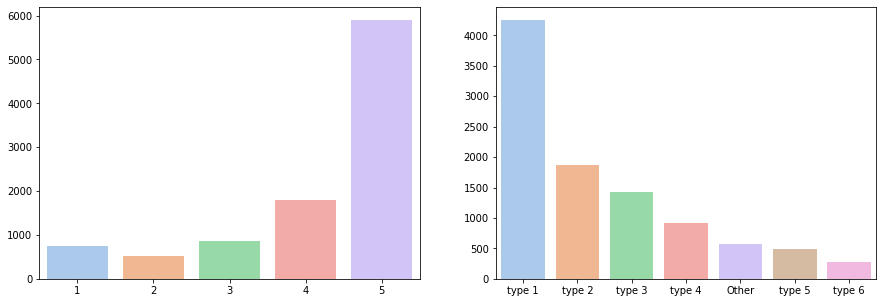

In [72]:
import matplotlib.pyplot as plt

rating_counts = result.Rating.value_counts()
types_counts = result.Topic.value_counts()
fig, ax = plt.subplots(1, 2, figsize=(15,5))
rating = sns.barplot(x = rating_counts.index, y = rating_counts.values, palette="pastel", ax=ax[0])
types = sns.barplot(x = types_counts.index, y = types_counts.values, palette="pastel", ax=ax[1])

In [73]:
fig = px.sunburst(result, path=['Topic', 'Rating'], title='Topics and ratings', color_discrete_sequence=px.colors.sequential.Burg)
fig.show()

In [74]:
result['len'] = result.Text.apply(lambda row: len(row.split()))
result.head()

Text   Topic Rating  \
0                                       Works great!  type 5      5   
1  This dries my hair faster that bigger, more po...  type 1      4   
2                                   Love this dryer!  type 3      5   
3                              styling hair in style  type 3      5   
4                                   Excellent dryer.  type 5      5   

                                          Lemma-text  len  
0                                     [works, great]    2  
1  [this, dries, my, hair, faster, that, bigger, ...   77  
2                                [love, this, dryer]    3  
3                         [styling, hair, in, style]    4  
4                                 [excellent, dryer]    2

In [75]:
result.Rating = pd.to_numeric(result.Rating)

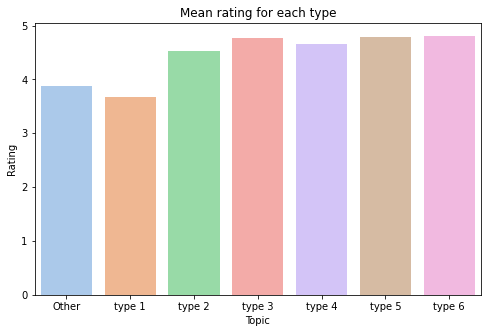

In [76]:
types_rating = result.drop('len', axis='columns').groupby(by=['Topic']).mean()

fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Mean rating for each type')
types = sns.barplot(x = types_rating.index, y = types_rating.Rating, palette="pastel")

In [77]:
result['Lemma_text'] = result['Lemma-text'].apply(lambda row: ' '.join(row))

In [78]:
result = result.drop('Lemma-text', axis=1)

In [79]:
def create_WordCloud(data, title=None):
    wordcloud = WordCloud(width = 500, height = 500,
                          background_color ='white',
                          min_font_size = 15
                         ).generate(" ".join(data.values))
                      
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=20)
    plt.show() 

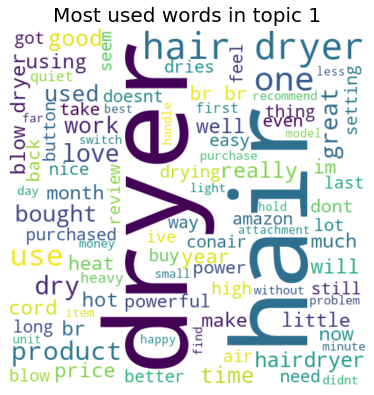

In [80]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 1'], title="Most used words in topic 1")

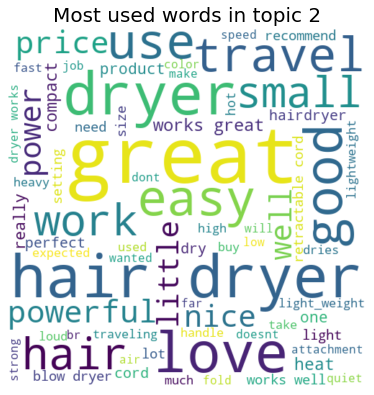

In [81]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 2'], title="Most used words in topic 2")

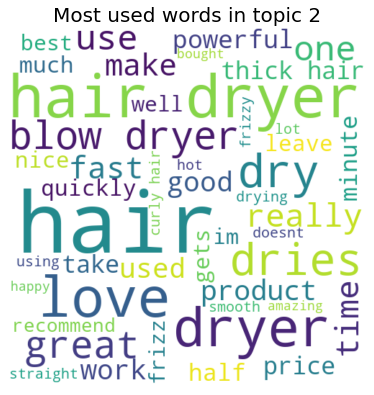

In [82]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 3'], title="Most used words in topic 2")

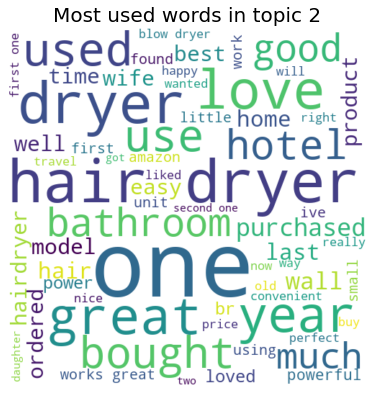

In [83]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 4'], title="Most used words in topic 2")

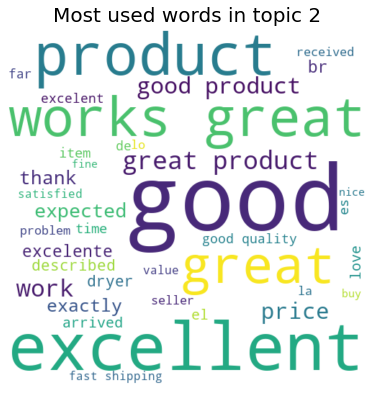

In [84]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 5'], title="Most used words in topic 2")

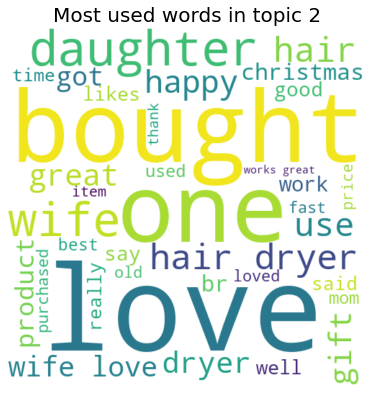

In [85]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 6'], title="Most used words in topic 2")